# Quantum Sensing Simulation using Quantum Spin Dynamics

## Introduction to Quantum Sensing

Quantum sensing refers to the use of quantum systems to detect extremely small changes in physical quantities, such as magnetic fields. Quantum sensors often leverage quantum coherence and entanglement to achieve higher sensitivity than classical sensors. 

One example of quantum sensing in real-world applications is the **Nitrogen-Vacancy (NV) center** in diamonds, which uses the spin states of a quantum particle to detect minute changes in magnetic fields. 

In this notebook, we will build on the quantum spin dynamics we explored in the previous notebook (QuantumSpinDynamicsInaMagneticField.pynb) , and simulate a simple **quantum sensor** based on a spin-1/2 particle. We will study how small variations in the magnetic field influence the quantum state of the spin and how noise affects the sensitivity of this system.

### Objectives:
1. Model a quantum spin-1/2 particle acting as a quantum sensor.
2. Simulate small variations in magnetic fields that the sensor can detect.
3. Analyze the system's sensitivity to weak magnetic fields.
4. Explore noise effects on sensing accuracy.


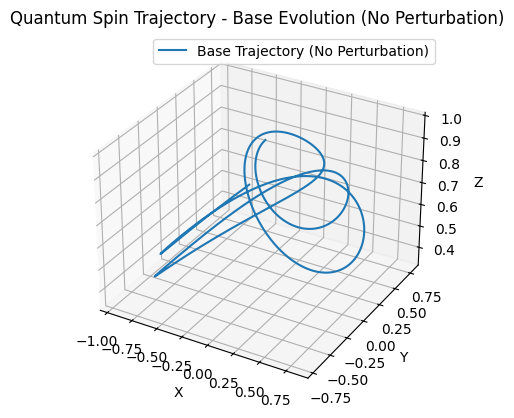

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.linalg import expm

# Constants
gamma = 1.0  # Gyromagnetic ratio (can adjust based on particle)
B0 = 1.0     # Base magnetic field along z-axis
B1 = 0.5     # Time-varying magnetic field component along x-axis
omega = 1.0  # Frequency of time-varying field

# Time evolution parameters
time_steps = 1000
t_max = 10.0
dt = t_max / time_steps
times = np.linspace(0, t_max, time_steps)

# Pauli matrices
sigma_x = np.array([[0, 1], [1, 0]])
sigma_y = np.array([[0, -1j], [1j, 0]])
sigma_z = np.array([[1, 0], [0, -1]])

# Initial state (spin-up along z-axis)
initial_state = np.array([1, 0], dtype=complex)

# Define the base magnetic field without perturbation
def base_magnetic_field(t):
    return B0 * sigma_z + B1 * np.cos(omega * t) * sigma_x

# Function to evolve state with time
def evolve_state(state, times, perturbation=None):
    evolved_states = []
    for t in times:
        H_t = base_magnetic_field(t)
        
        # Add a small perturbation to simulate weak magnetic field detection
        if perturbation:
            H_t += perturbation * sigma_z  # Add perturbation along z-axis
        
        U_t = expm(-1j * H_t * dt)
        state = U_t @ state
        evolved_states.append(state)
    
    return np.array(evolved_states)

# Evolve the system without any perturbation
evolved_states_base = evolve_state(initial_state, times)

# Function to compute expectation values
def expectation_values(states):
    x_vals = [np.real(np.conj(state) @ (sigma_x @ state)) for state in states]
    y_vals = [np.real(np.conj(state) @ (sigma_y @ state)) for state in states]
    z_vals = [np.real(np.conj(state) @ (sigma_z @ state)) for state in states]
    return np.array(x_vals), np.array(y_vals), np.array(z_vals)

# Compute expectation values for base magnetic field
x_vals_base, y_vals_base, z_vals_base = expectation_values(evolved_states_base)

# Plot the base evolution without any perturbation (normal sensor operation)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x_vals_base, y_vals_base, z_vals_base, label='Base Trajectory (No Perturbation)')
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Quantum Spin Trajectory - Base Evolution (No Perturbation)')
plt.legend()
plt.show()


## Simulating Weak Magnetic Field Perturbation

In this section, we will introduce a small perturbation to the base magnetic field to simulate a quantum sensor detecting weak variations in the field. This perturbation could represent the small external fields that the sensor is designed to detect. 

The goal is to observe how the quantum state responds to this perturbation, and analyze how sensitive the system is to weak magnetic fields.


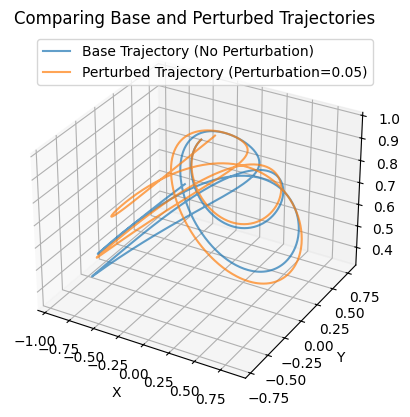

In [2]:
# Simulate the system with a small perturbation
perturbation_strength = 0.05  # Small external field perturbation

evolved_states_perturbed = evolve_state(initial_state, times, perturbation=perturbation_strength)

# Compute expectation values for perturbed evolution
x_vals_perturbed, y_vals_perturbed, z_vals_perturbed = expectation_values(evolved_states_perturbed)

# Plot the perturbed trajectory to compare with the base trajectory
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Base trajectory
ax.plot(x_vals_base, y_vals_base, z_vals_base, label='Base Trajectory (No Perturbation)', alpha=0.7)

# Perturbed trajectory
ax.plot(x_vals_perturbed, y_vals_perturbed, z_vals_perturbed, label=f'Perturbed Trajectory (Perturbation={perturbation_strength})', alpha=0.7)

ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Comparing Base and Perturbed Trajectories')
plt.legend()
plt.show()


## Sensitivity Analysis

Now that we have simulated the quantum sensor detecting a weak magnetic field perturbation, we can analyze the system's sensitivity. This involves varying the strength of the perturbation and studying how the quantum state responds.

We will try different values for the perturbation strength and observe how the quantum sensor's trajectory on the Bloch sphere changes in response to these small variations in the magnetic field.


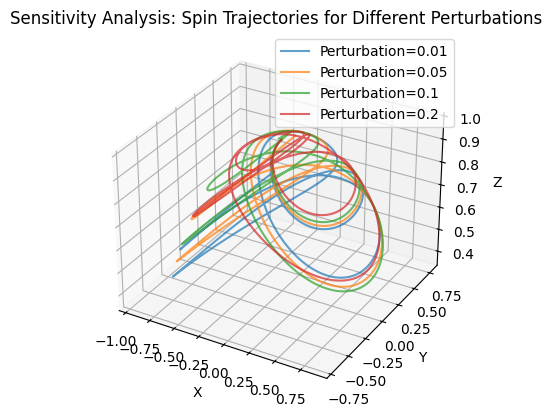

In [3]:
# Function to run sensitivity analysis for different perturbation strengths
def sensitivity_analysis(perturbation_strengths):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    
    for strength in perturbation_strengths:
        evolved_states = evolve_state(initial_state, times, perturbation=strength)
        x_vals, y_vals, z_vals = expectation_values(evolved_states)
        
        ax.plot(x_vals, y_vals, z_vals, label=f'Perturbation={strength}', alpha=0.7)
    
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Sensitivity Analysis: Spin Trajectories for Different Perturbations')
    plt.legend()
    plt.show()

# Run sensitivity analysis for different perturbation strengths
perturbation_strengths = [0.01, 0.05, 0.1, 0.2]
sensitivity_analysis(perturbation_strengths)


## Conclusion

In this notebook, we have extended our study of quantum spin dynamics to simulate a basic quantum sensor. By introducing small perturbations in the magnetic field, we were able to model how a quantum sensor would detect weak external fields.

The system's sensitivity to these weak fields was analyzed by varying the strength of the perturbation and observing the spin's trajectory on the Bloch sphere. This simple model provides a foundation for understanding more complex quantum sensors, such as those used in real-world applications like magnetometry and biological imaging.

